In [1]:
library('ggplot2')
library('latex2exp')
library('pracma')
library('dplyr')
library('e1071')
library('tseries')

Warning message:
"pakiet 'ggplot2' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'latex2exp' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'dplyr' został zbudowany w wersji R 4.2.2"

Dołączanie pakietu: 'dplyr'


Następujące obiekty zostały zakryte z 'package:stats':

    filter, lag


Następujące obiekty zostały zakryte z 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"pakiet 'e1071' został zbudowany w wersji R 4.2.2"

Dołączanie pakietu: 'e1071'


Następujący obiekt został zakryty z 'package:pracma':

    sigmoid


Warning message:
"pakiet 'tseries' został zbudowany w wersji R 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# Preparing data

In [2]:
data <- read.csv('StudentsPerformance.csv')
colnames(data)

[1] "gender"                      "race.ethnicity"             
[3] "parental.level.of.education" "lunch"                      
[5] "test.preparation.course"     "math.score"                 
[7] "reading.score"               "writing.score"

In [3]:
data1 <- subset(data, select=c('math.score', 'reading.score', 'writing.score'))
cor(data1)

,math.score,reading.score,writing.score
math.score,1.0000000,0.8175797,0.8026420
reading.score,0.8175797,1.0000000,0.9545981
writing.score,0.8026420,0.9545981,1.0000000


In [4]:
X <- data$math.score
Y <- data$reading.score
df <- data.frame(X=X,Y=Y)

# Basic statictics for X
Also including plots and comparison to normal distribution

In [5]:
summary(X)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   57.00   66.00   66.09   77.00  100.00 

In [6]:
mean(X)
skewness(X)
3+kurtosis(X)
var(X)
sd(X)

[1] 66.089

[1] -0.2780989

[1] 3.261065

[1] 229.919

[1] 15.16308

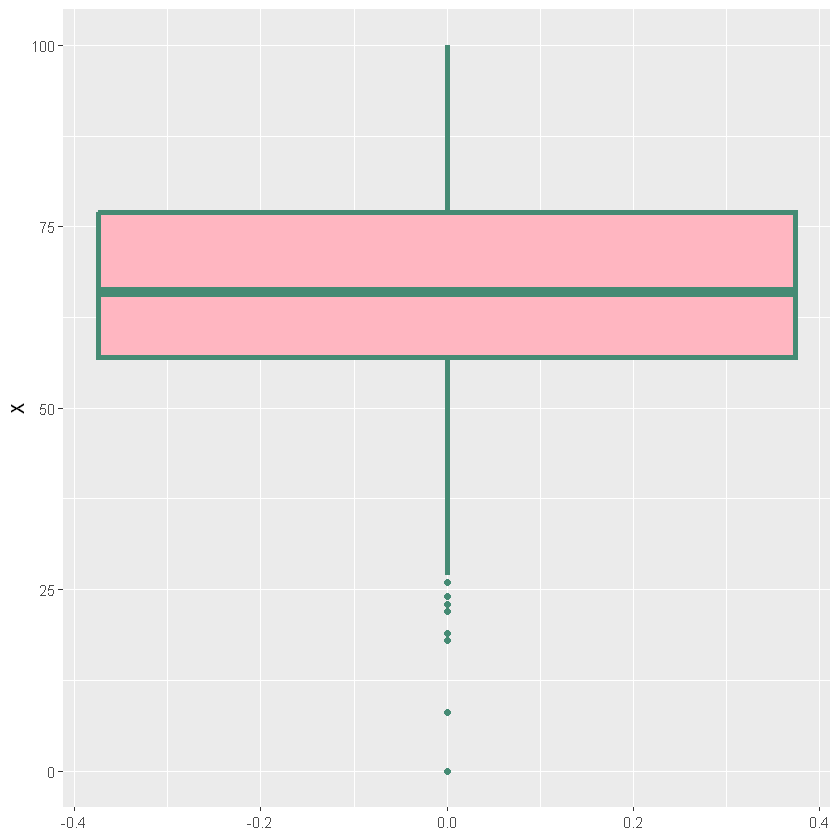

In [7]:
box_x <- ggplot(mapping=aes(y = X))+
    geom_boxplot(col='aquamarine4', fill='lightpink', linewidth=1.5)
box_x

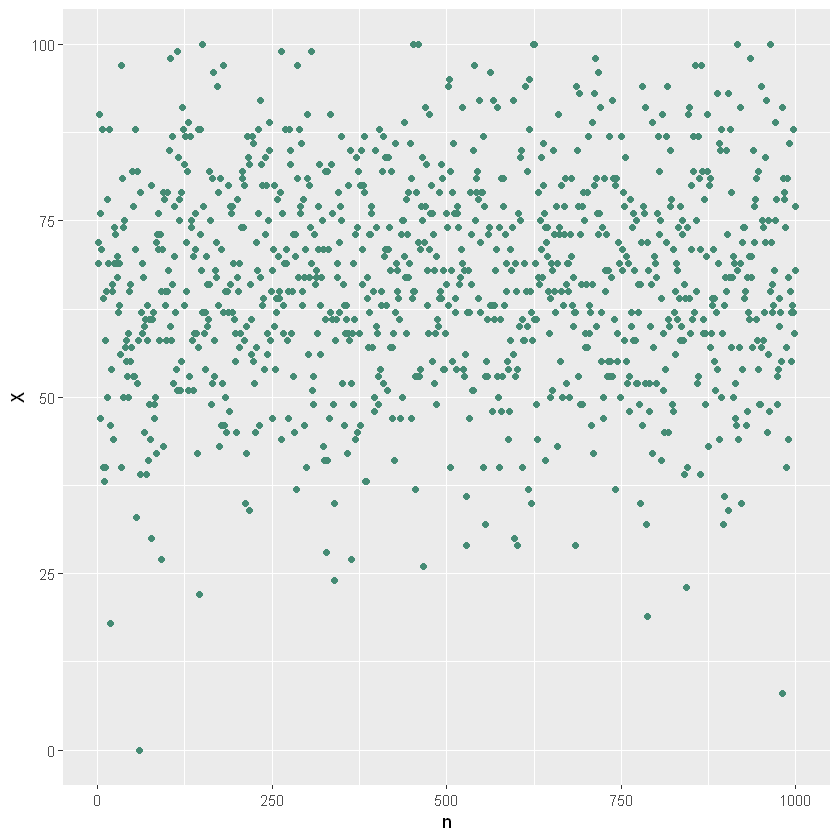

In [8]:
X_rozp <- ggplot(mapping=aes(1:length(X),X))+
    geom_point(col='aquamarine4')+xlab('n')
X_rozp

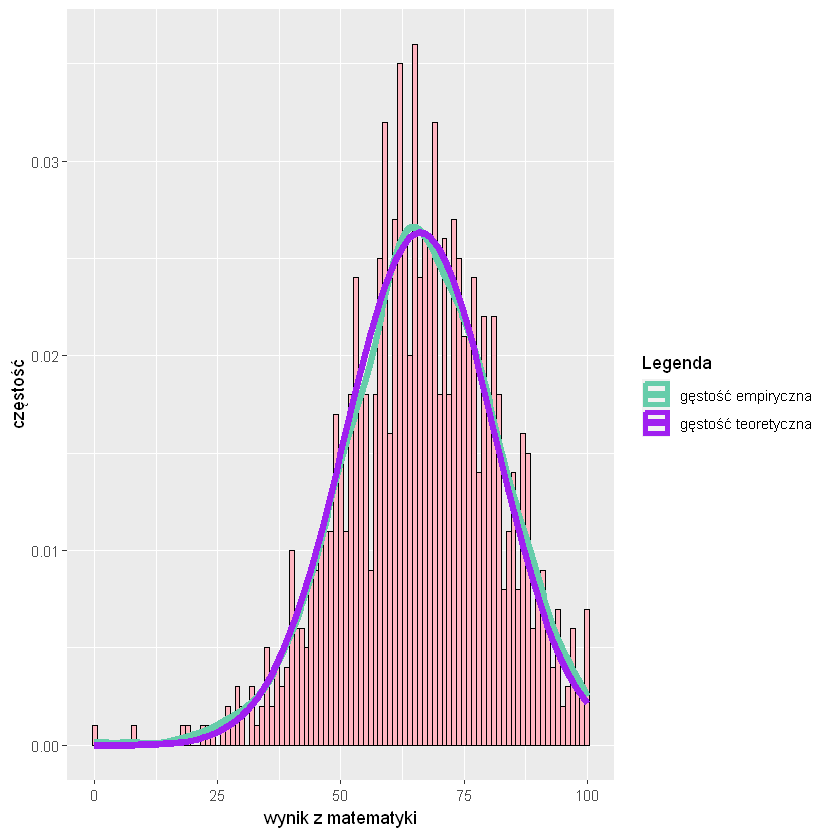

In [9]:
X_dens <- ggplot(df, mapping=aes(X))+geom_histogram(aes(y=after_stat(count / sum(count))), 
                                      binwidth=1, fill='lightpink', col='black')+
    geom_density(aes(col='gęstość empiryczna'), linewidth=2) + 
    stat_function(fun=dnorm, args=list(mean=66.09, sd=15.16), 
                  aes(col='gęstość teoretyczna'), linewidth=2)+
    xlab(TeX('wynik z matematyki'))+ylab('częstość')+
    scale_color_manual(values=c('aquamarine3', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
X_dens

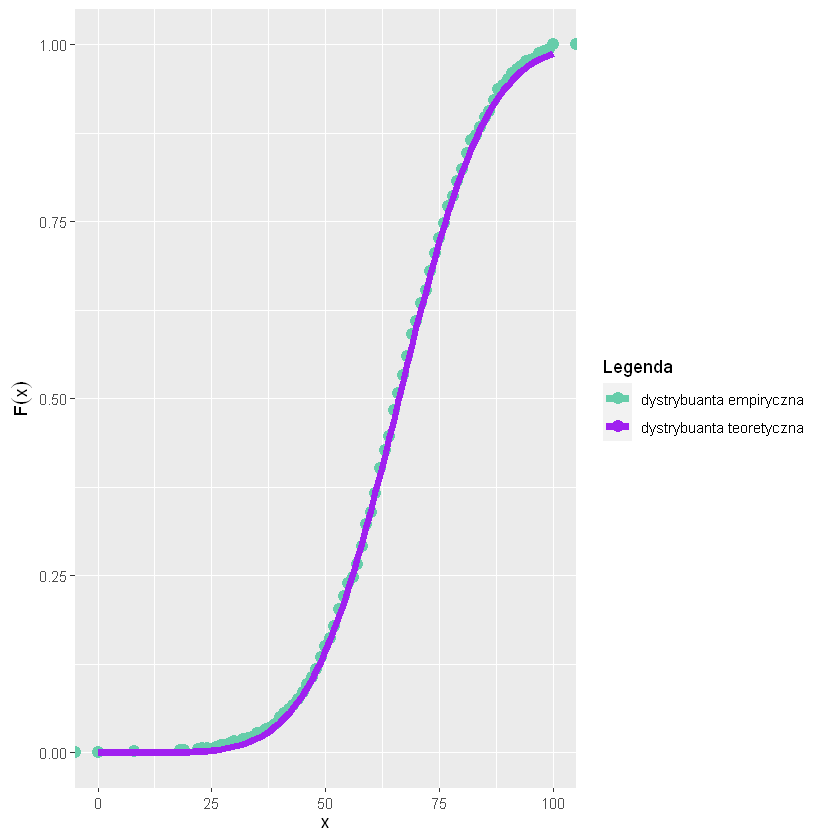

In [10]:
X_dyst <- ggplot(df, aes(X))+
    stat_ecdf(geom='point', aes(col='dystrybuanta empiryczna'), cex=3)+ 
    stat_function(fun=pnorm, args=list(mean=66.09, sd=15.16), 
                  aes(col='dystrybuanta teoretyczna'), linewidth=2)+
    xlab(TeX('$x$'))+ylab(TeX('$F(x)$'))+
    scale_color_manual(values=c('aquamarine3', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
X_dyst

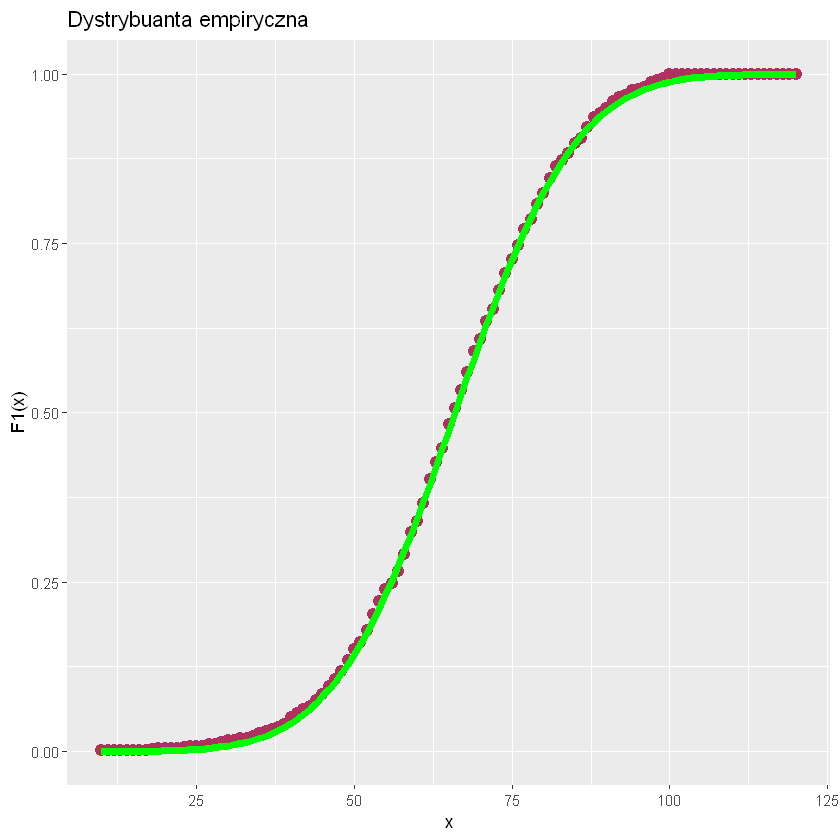

In [11]:
F1 <- ecdf(X)
x <- 10:120
plot1 <- ggplot(mapping=aes(x,F1(x)))+geom_point(col='maroon', cex=3)+ggtitle('Dystrybuanta empiryczna')
plot2 <- plot1 + geom_line(aes(x, pnorm(x,66,15)), col='green', linewidth=2)
plot2

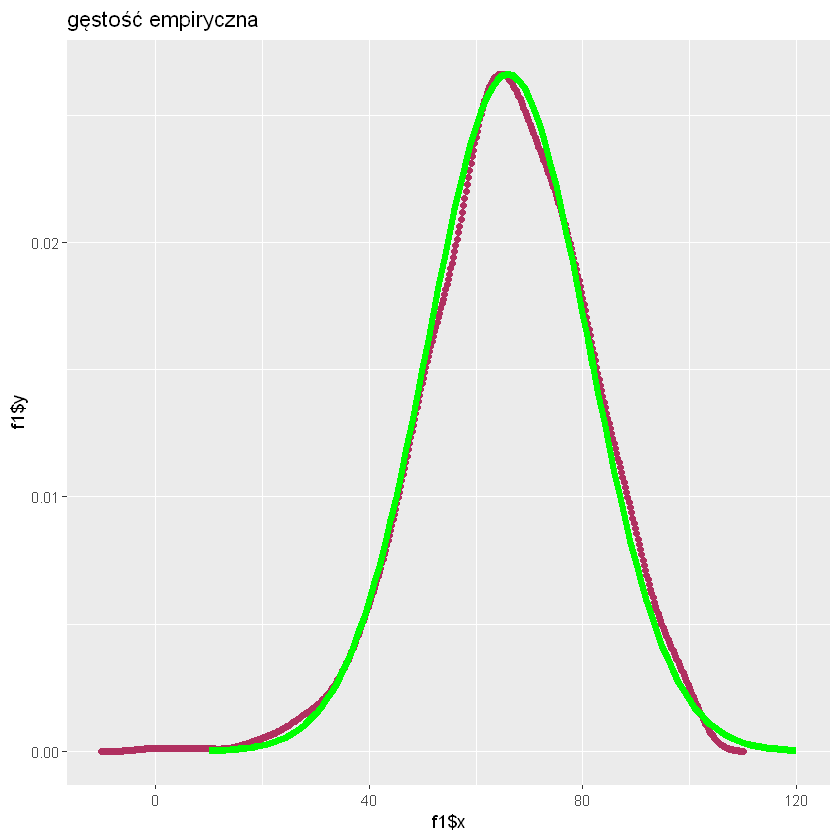

In [12]:
f1 <- density(X)
plot3 <- ggplot(mapping=aes(f1$x,f1$y))+geom_point(col='maroon')+ggtitle('gęstość empiryczna')
plot4 <- plot3 + geom_line(aes(x, dnorm(x,66,15)), col='green', linewidth=2)
plot4

# Basic statictics for Y
Also including plots and comparison to normal distribution

In [13]:
summary(Y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   59.00   70.00   69.17   79.00  100.00 

In [14]:
mean(Y)
skewness(Y)
3+kurtosis(Y)
var(Y)
sd(Y)

[1] 69.169

[1] -0.2583277

[1] 2.920232

[1] 213.1656

[1] 14.60019

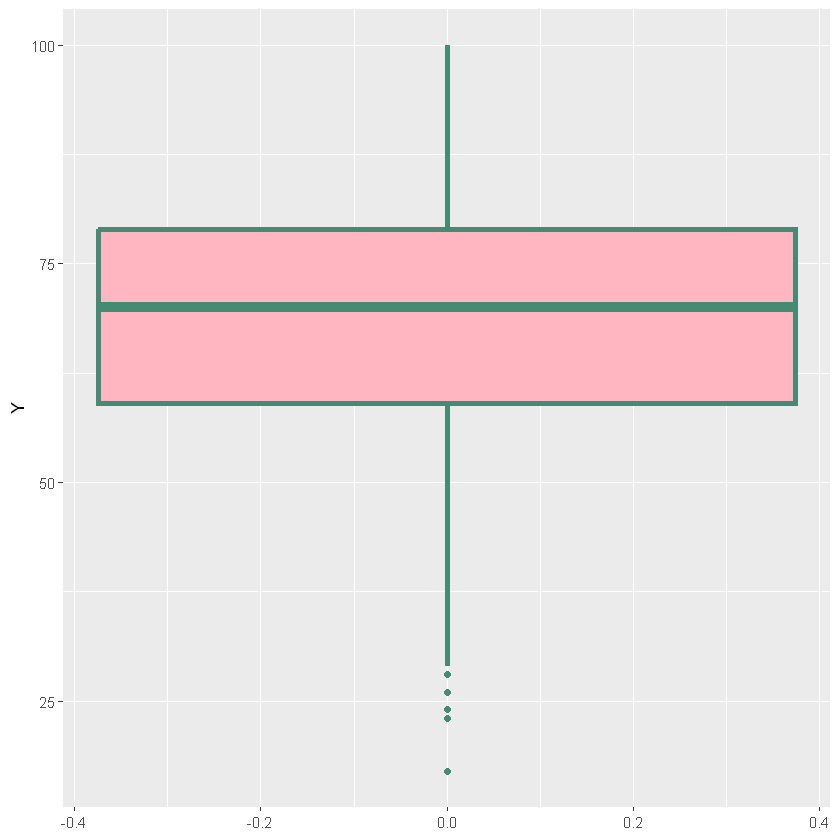

In [15]:
box_y <- ggplot(mapping=aes(y = Y))+
    geom_boxplot(col='aquamarine4', fill='lightpink', linewidth=1.5)
box_y

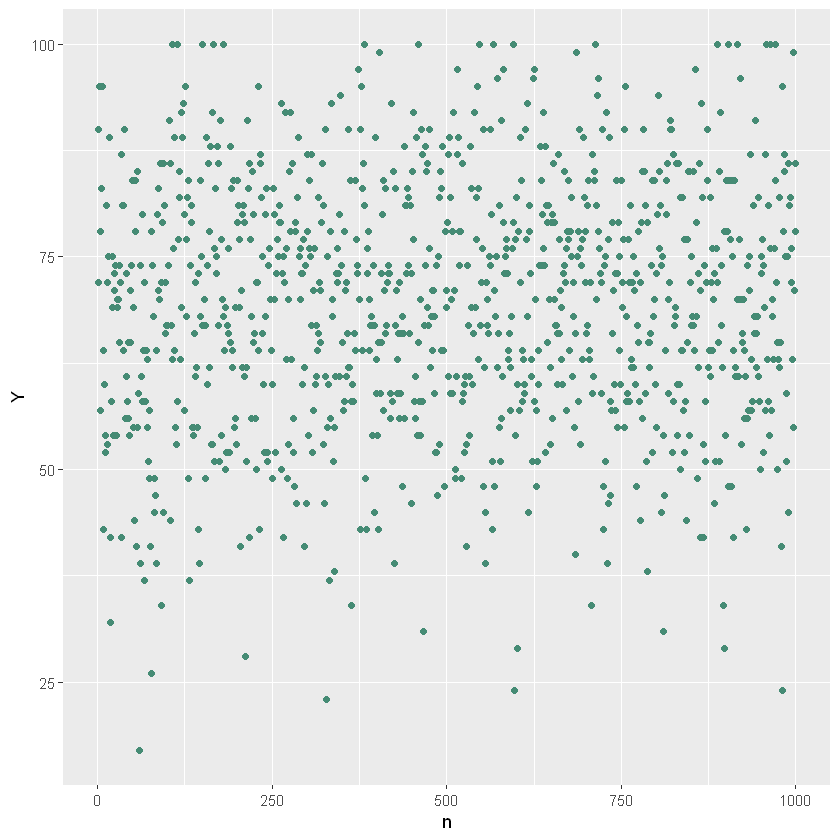

In [16]:
Y_rozp <- ggplot(mapping=aes(1:length(Y),Y))+
    geom_point(col='aquamarine4')+xlab('n')
Y_rozp

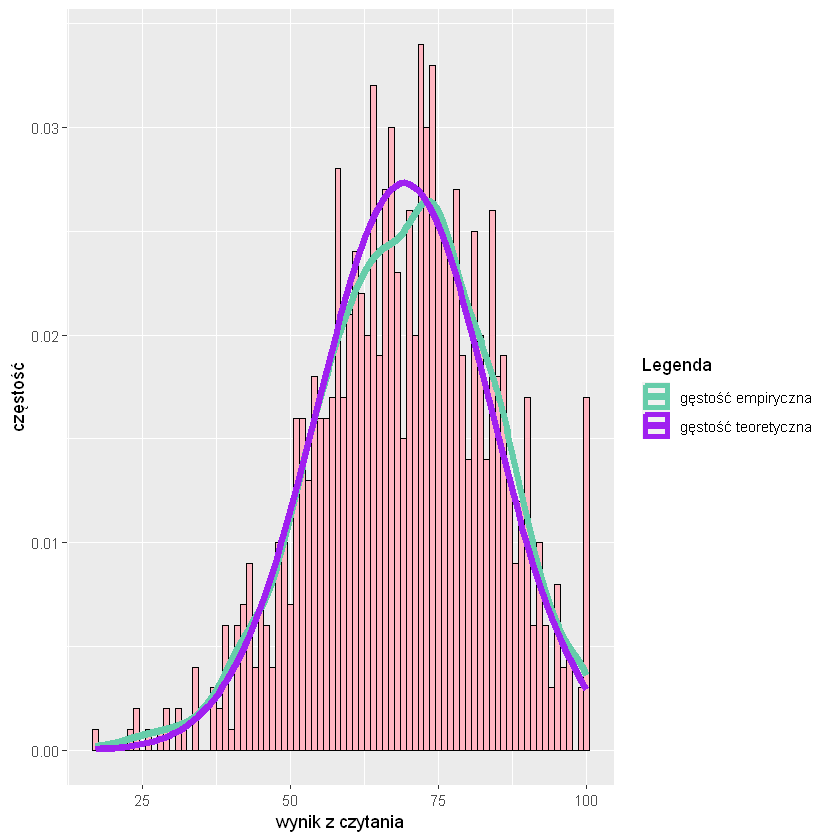

In [17]:
Y_dens <- ggplot(df, mapping=aes(Y))+geom_histogram(aes(y=after_stat(count / sum(count))), 
                                      binwidth=1, fill='lightpink', col='black')+
    geom_density(aes(col='gęstość empiryczna'), linewidth=2) + 
    stat_function(fun=dnorm, args=list(mean=69.17, sd=14.6), 
                  aes(col='gęstość teoretyczna'), linewidth=2)+
    xlab('wynik z czytania')+ylab('częstość')+
    scale_color_manual(values=c('aquamarine3', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
Y_dens

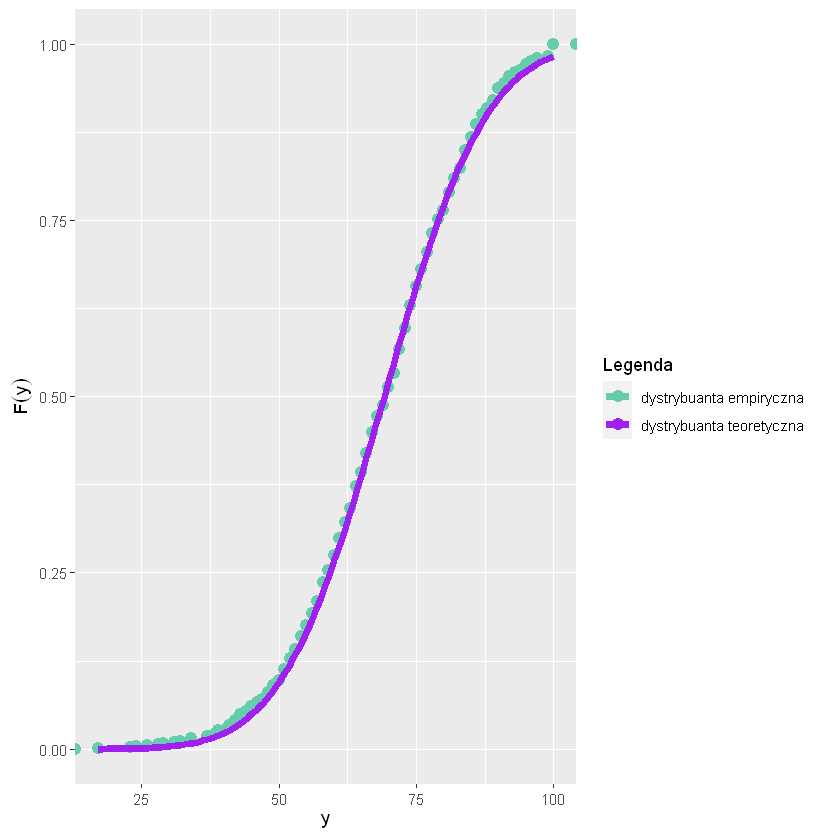

In [18]:
Y_dyst <- ggplot(df, aes(Y))+
    stat_ecdf(geom='point', aes(col='dystrybuanta empiryczna'), cex=3)+ 
    stat_function(fun=pnorm, args=list(mean=69.17, sd=14.6), 
                  aes(col='dystrybuanta teoretyczna'), linewidth=2)+
    xlab(TeX('$y$'))+ylab(TeX('$F(y)$'))+
    scale_color_manual(values=c('aquamarine3', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
Y_dyst

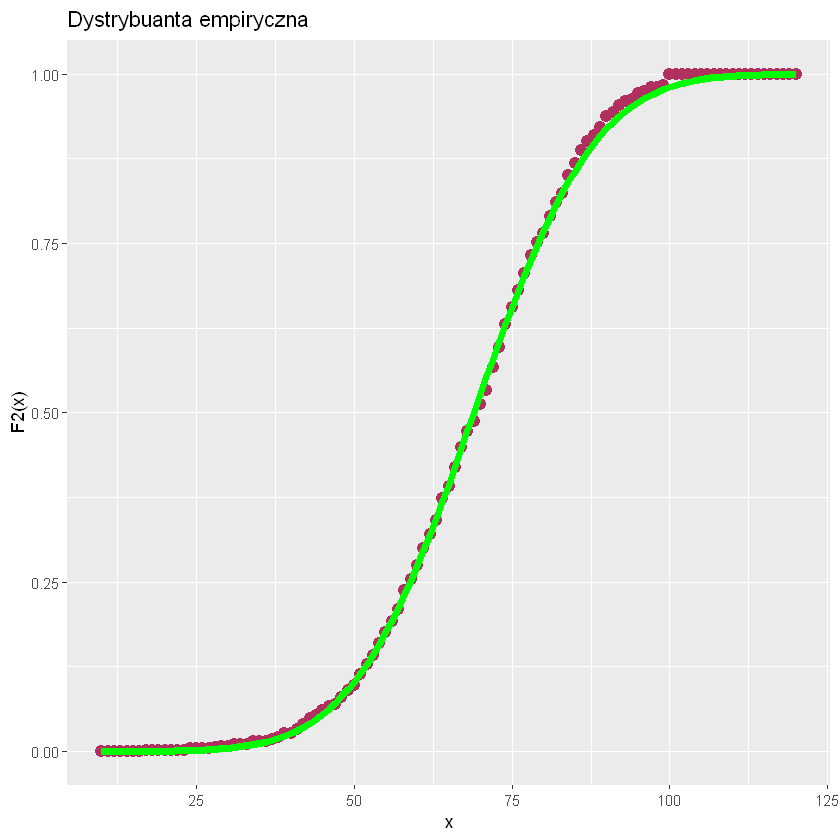

In [19]:
F2 <- ecdf(Y)
x <- 10:120
plot1 <- ggplot(mapping=aes(x,F2(x)))+geom_point(col='maroon', cex=3)+ggtitle('Dystrybuanta empiryczna')
plot2 <- plot1 + geom_line(aes(x, pnorm(x,69,15)), col='green', linewidth=2)
plot2

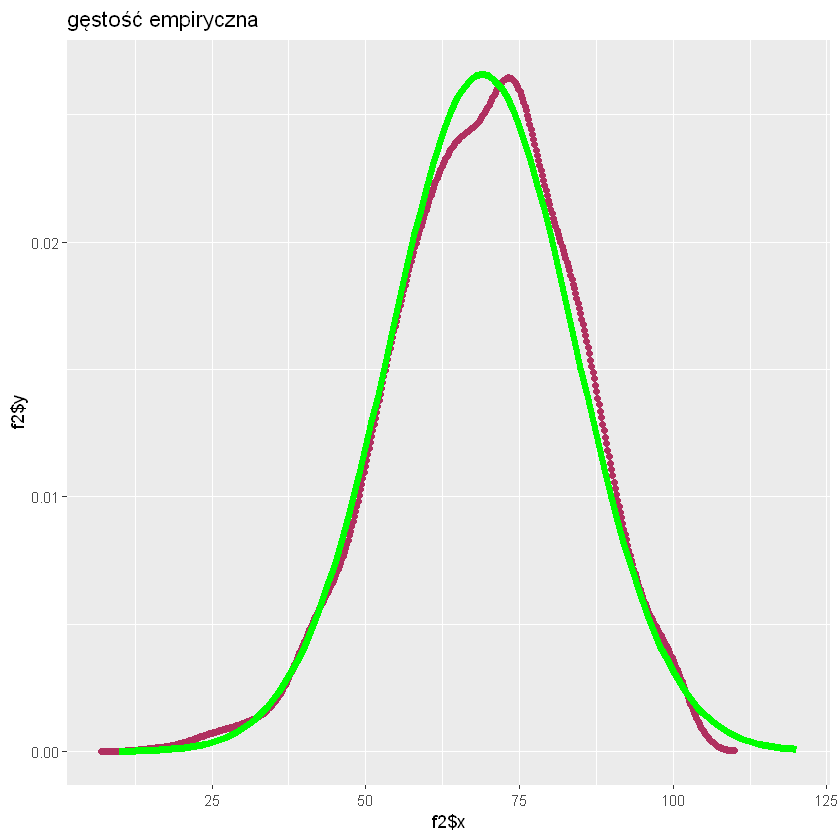

In [20]:
f2 <- density(Y)
plot3 <- ggplot(mapping=aes(f2$x,f2$y))+geom_point(col='maroon')+ggtitle('gęstość empiryczna')
plot4 <- plot3 + geom_line(aes(x, dnorm(x,69,15)), col='green', linewidth=2)
plot4

# Classical Linear Regression Model
method: Linear least squares (LLS)

In [21]:
reg_ab <- function(A,B){
    x <- mean(A)
    y <- mean(B)
    b1 <- sum((A)*(B-y))/sum((A-x)^2)
    b0 <- y-b1*x
    return(list(b1,b0))
}

In [22]:
set.seed(12345)
df <- data.frame(X,Y)
n <- length(X)
df2 <- df[sample(nrow(df)),]
X_train <- df2$X[1:(0.8*n)]
Y_train <- df2$Y[1:(0.8*n)]
X_test <- df2$X[(0.8*n+1):n]
Y_test <- df2$Y[(0.8*n+1):n]
df_train <- data.frame(X_train,Y_train)
df_test <- data.frame(X_test,Y_test)


In [23]:
lm7 <- lm(Y_train~X_train)
lm7
lm17 <- polyfit(X_train, Y_train, 1)
lm18 <- X_train*lm17[[1]]+lm17[[2]]


Call:
lm(formula = Y_train ~ X_train)

Coefficients:
(Intercept)      X_train  
    17.0455       0.7904  


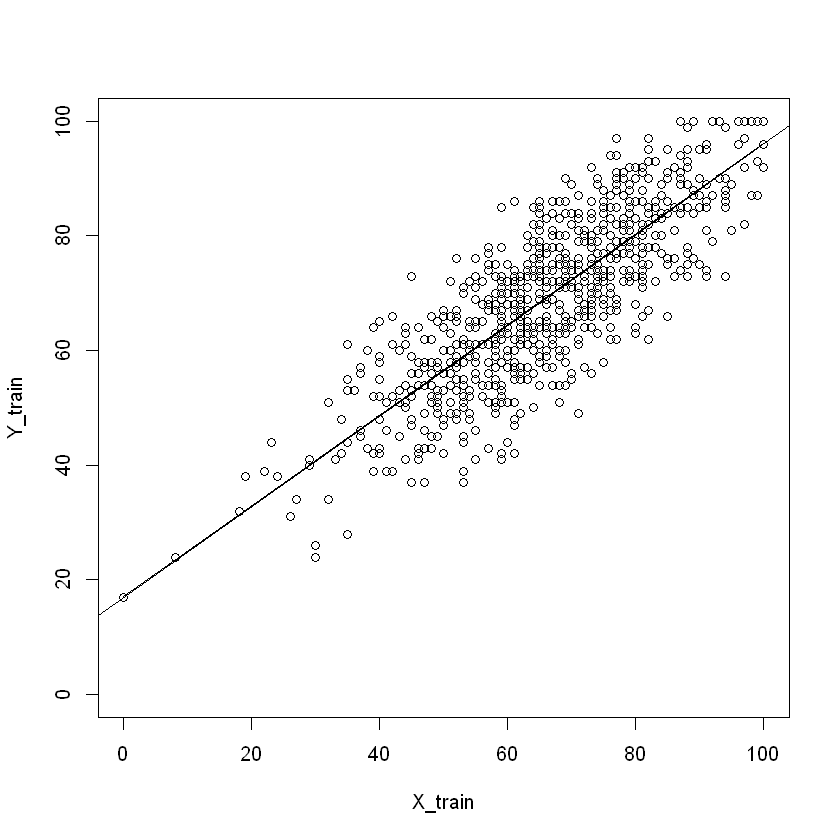

In [24]:
plot(X_train, Y_train, ylim=c(0,100))
abline(lm7)
lines(X_train, lm18)

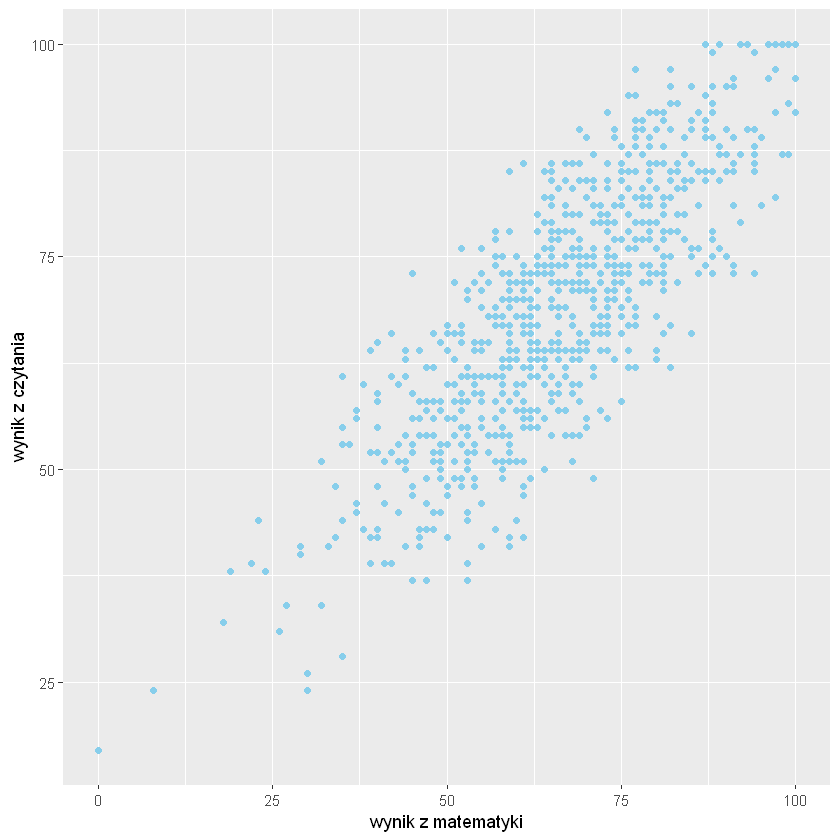

In [25]:
rozpr_train <- ggplot(df_train, aes(X_train, Y_train))+geom_point(col='skyblue')+
    xlab('wynik z matematyki')+ylab('wynik z czytania')
rozpr_train

### A positive correlation

In [26]:
cor(df_train$X_train, df_train$Y_train)

[1] 0.8206071

In [27]:
wsp <- reg_ab(df_train$X_train,df_train$Y_train)
wsp

[[1]]
[1] 0.7904322

[[2]]
[1] 17.04555

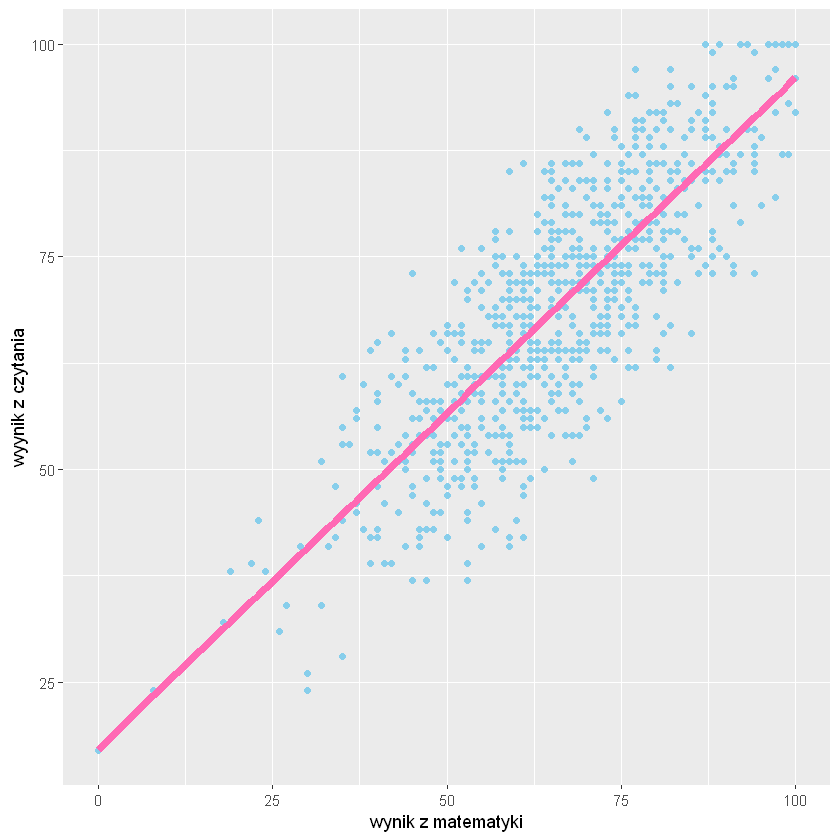

In [28]:
rozpr_reg_train <- ggplot(df_train, aes(X_train, Y_train))+geom_point(col='skyblue')+ 
    geom_line(aes(X_train, X_train*wsp[[1]]+wsp[[2]]), col='hotpink', linewidth=2)+
    xlab('wynik z matematyki')+ylab('wyynik z czytania')
rozpr_reg_train

## SST - Sum of Squares Total

In [29]:
Y_t <- df_train$Y_train
ym <- mean(Y_t)
SST <- sum((Y_t-ym)^2)
SST
SST/(length(Y_t)-1)
var(Y_t)

[1] 175081.3

[1] 219.1255

[1] 219.1255

In [30]:
var(df$Y)

[1] 213.1656

## SSR - Sum of Squares Regression

In [31]:
SSR <- sum((df_train$X_train*wsp[[1]]+wsp[[2]]-ym)^2)
SSR
SSR/(length(Y_t)-1)
var(df_train$X_train*wsp[[1]]+wsp[[2]]-ym)

[1] 117899

[1] 147.5582

[1] 147.5582

In [32]:
Y_t1 <- df_test$Y_test
ym1 <- mean(Y_t1)
SST1 <- sum((Y_t1-ym1)^2)
SST1
SSR1 <- sum((df_test$X_test*wsp[[1]]+wsp[[2]]-ym1)^2)
SSR1
SSR1/(length(Y_t1)-1)
SSR1/SST1

[1] 37860.75

[1] 25656.82

[1] 128.9287

[1] 0.6776627

## SSE - Sum of Squares Errors

In [33]:
SSE <- SST-SSR
SSE
SSE/(length(Y_t)-2)
var(Y_t-df_train$X_train*wsp[[1]]-wsp[[2]])

[1] 57182.25

[1] 71.65695

[1] 71.56727

## Coefficient of determination

In [34]:
SSR/SST

[1] 0.673396

## Confidence intervals

In [35]:
alpha <- 0.02
b0p <- wsp[[2]]
b1p <- wsp[[1]]
X_base <- df_train$X_train
xm <- mean(X_base)
Y_base <- df_train$Y_train
Yp <- X_base*b1p+b0p
n_base <- length(X_base)
S2 <- sum((Y_base-Yp)^2)/(n_base-2)
tq <- qt(1-alpha/2,n_base-2)
left0 <- b0p-tq*sqrt(S2)*sqrt(1/n_base+xm^2/sum((X_base-xm)^2))
right0 <- b0p+tq*sqrt(S2)*sqrt(1/n_base+xm^2/sum((X_base-xm)^2))
left1 <- b1p-tq*sqrt(S2)/sqrt(sum((X_base-xm)^2))
right1 <- b1p+tq*sqrt(S2)/sqrt(sum((X_base-xm)^2))

Lets set the significance level to $\alpha=0.05.$ Therefore the confidence interval is presented as follows:
* for $\beta_0$

In [36]:
left0
right0
b0p

[1] 13.96712

[1] 20.12397

[1] 17.04555

* for $\beta_1$

In [37]:
left1
right1
b1p

[1] 0.7450081

[1] 0.8358563

[1] 0.7904322

In [38]:
S2

[1] 71.65695

# Residuals

In [39]:
ei <- df$Y-df$X*wsp[[1]]-wsp[[2]]
df_ei <- data.frame(df$X, ei)

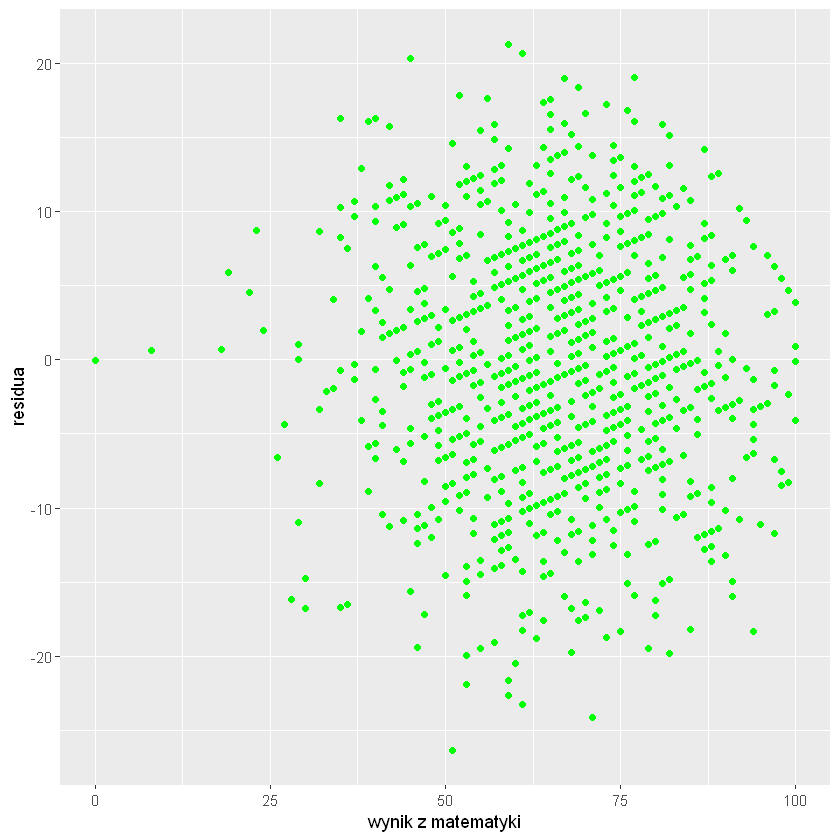

In [40]:
ei_plot <- ggplot(df_ei, aes(df.X, ei))+geom_point(col='green')+xlab('wynik z matematyki')+ylab(TeX('residua'))
ei_plot

## Checking if mean is 0

In [41]:
mean(df_ei$ei)

[1] -0.1154202

## Checking constance of variance

In [42]:
var(df_ei$ei)

[1] 70.68029

In [43]:
var_vec <- vector()
k <- 1
temp = 0
e123 <- df2$Y-wsp[[1]]*df2$X-wsp[[2]]
sd(e123[1:800])
sd(e123)
sd(e123[801:1000])
for(i in seq(10,1000,10)){
    var_vec[k] <- var(e123[(temp+1):i])
    k <- k+1
    
}

[1] 8.459744

[1] 8.407157

[1] 8.197951

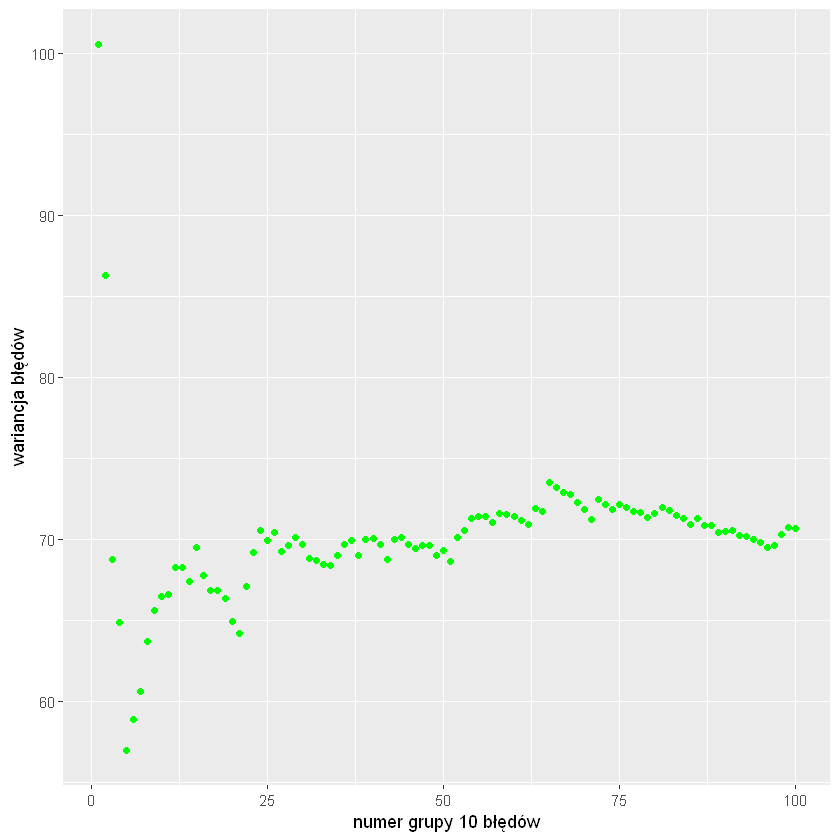

In [44]:
ei_var <- ggplot(mapping=aes(1:length(seq(10,1000,10)), var_vec))+geom_point(col='green')+
    ylab('wariancja błędów')+ xlab('numer grupy 10 błędów')
ei_var

In [45]:
H <- X %*% solve(t(X)%*%X) %*% t(X)
hii <- diag(H)

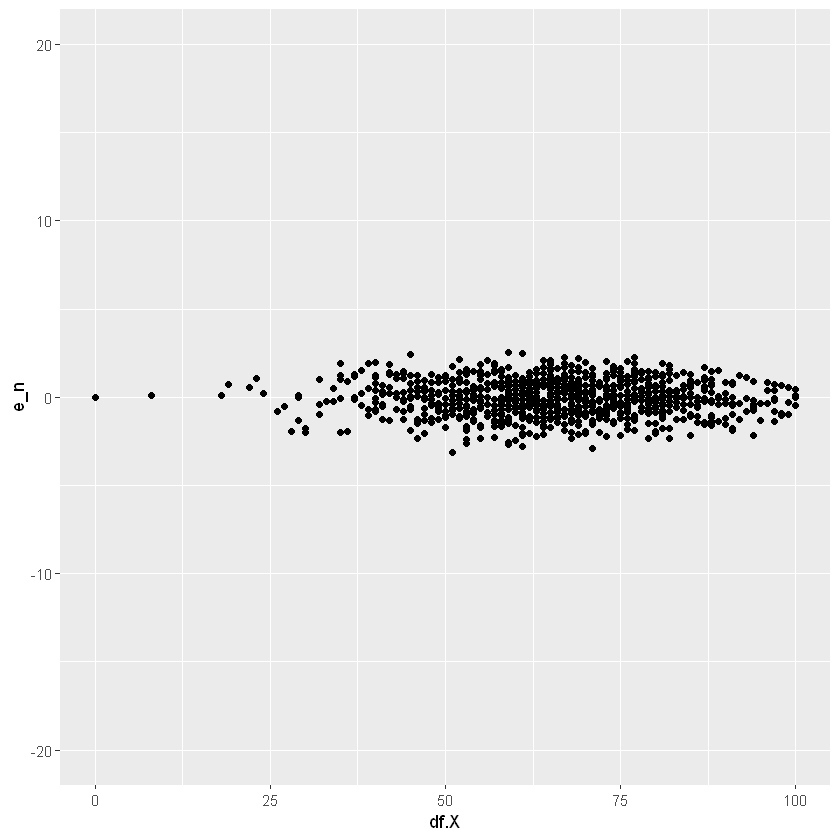

In [46]:
em <- var(df_ei$ei)
e_n <- df_ei$ei/(sqrt(em*(1-hii)))
ggplot(df_ei, aes(df.X, e_n))+geom_point() + ylim(-20,20)

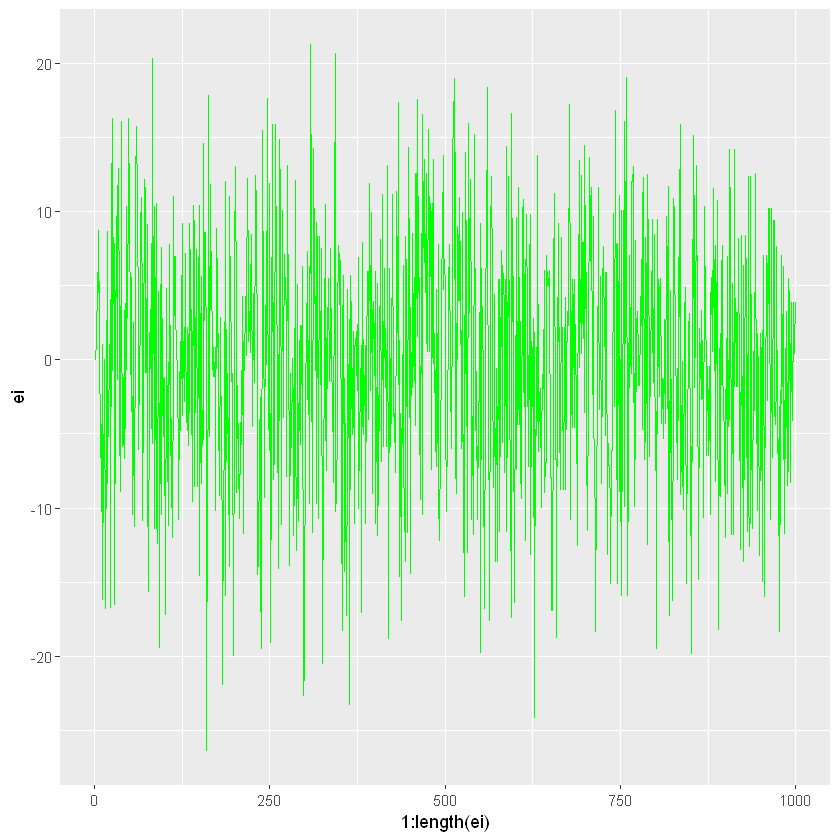

In [47]:
df3 <- data.frame(df$X*wsp[[1]]+wsp[[2]], ei)
colnames(df3) <- c('Yi','ei')
df3 <- data.frame(df3 %>% arrange(Yi))
ei_var <- ggplot(df3, aes(1:length(ei), ei))+geom_line(col='green')
ei_var

## Checking if residuals are correlated

In [48]:
emp_ACVF <- function(X,h){
    n <- length(X)
    xm <- mean(X)
    X1 <- X[1:(n-abs(h))]
    X2 <- X[(1+abs(h)):n]
    return(1/n*sum((X1-xm)*(X2-xm)))
}

In [49]:
emp_acorr <- function(X,h){
    Z <- emp_ACVF(X,h)
    Y <- emp_ACVF(X,0)
    return(Z/Y)
}

In [50]:
cov <- vector()
corr <- vector()
for(h in 0:50) cov[h+1] <- emp_ACVF(df_ei$ei, h)
for(h in 0:50) corr[h+1] <- emp_acorr(df_ei$ei, h)

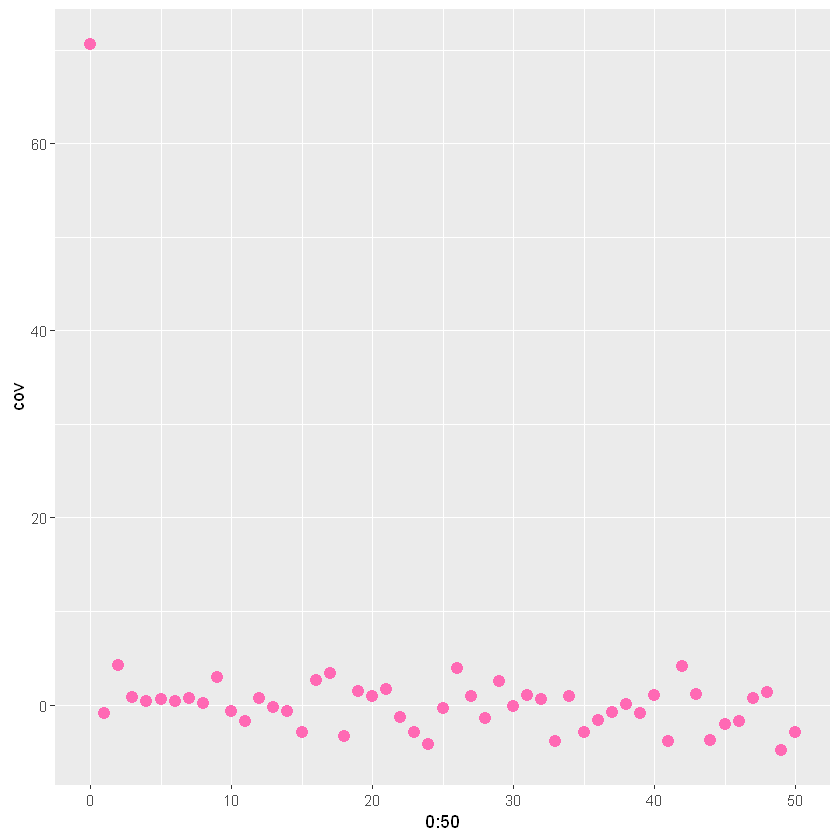

In [51]:
ggplot(mapping=aes(0:50, cov))+geom_point(col='hotpink', cex=3)

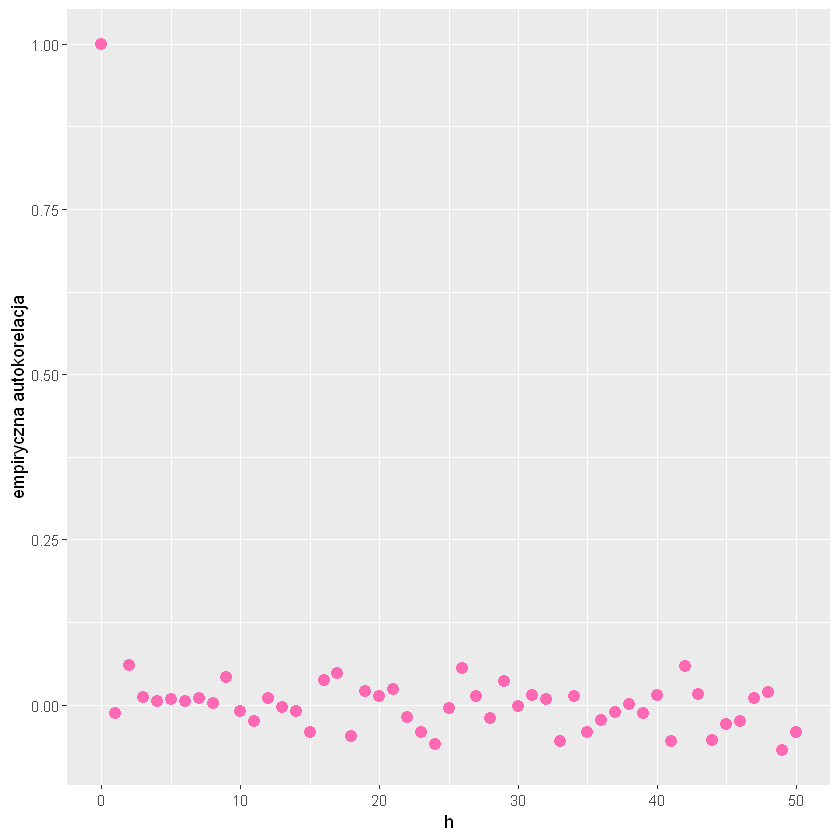

In [52]:
ei_corr <- ggplot(mapping=aes(0:50, corr))+geom_point(col='hotpink', cex=3)+
    xlab(TeX('$h$'))+ylab('empiryczna autokorelacja')
ei_corr

## Normality tests

In [53]:
jarque.bera.test(df_ei$ei)


	Jarque Bera Test

data:  df_ei$ei
X-squared = 9.7454, df = 2, p-value = 0.007653


In [54]:
ks.test(unique(df_ei$ei), "pnorm", 0, 8.4, B=1000)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  unique(df_ei$ei)
D = 0.0434, p-value = 0.1177
alternative hypothesis: two-sided


In [55]:
shapiro.test(df_ei$ei)


	Shapiro-Wilk normality test

data:  df_ei$ei
W = 0.9956, p-value = 0.005716


## Comparing distribution of the residuals with $\mathcal{N}\left(0,8.4\right)$

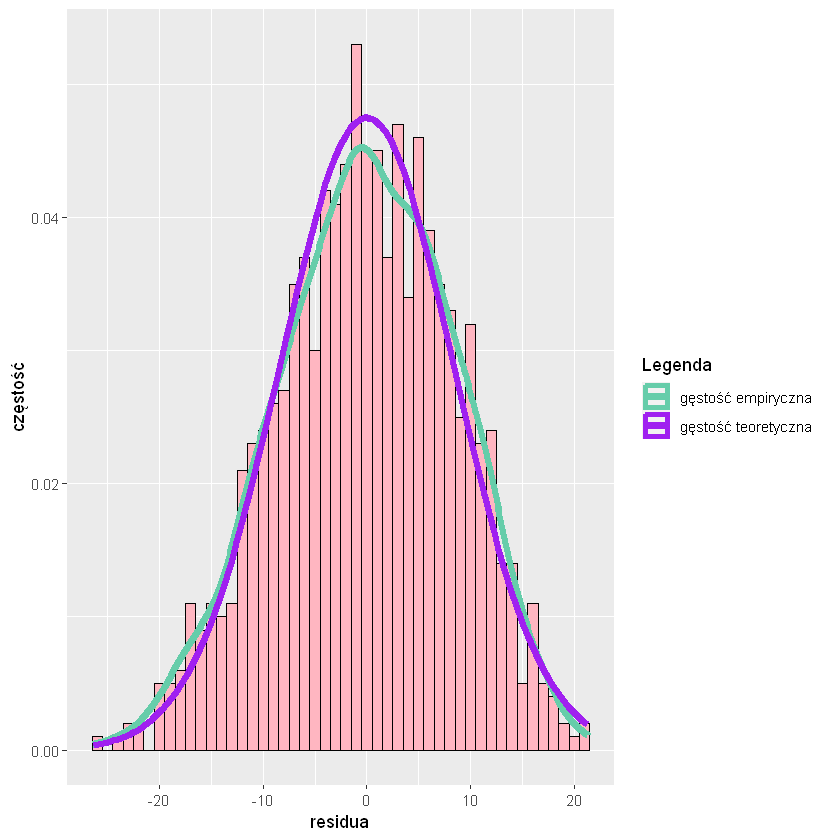

In [56]:
dens <- ggplot(df_ei, aes(ei))+geom_histogram(aes(y=after_stat(count / sum(count))), 
                                      binwidth=1, fill='lightpink', col='black')+
    geom_density(aes(col='gęstość empiryczna'), linewidth=2) + 
    stat_function(fun=dnorm, args=list(mean=0, sd=8.4), 
                  aes(col='gęstość teoretyczna'), linewidth=2)+
    xlab('residua')+ylab('częstość')+
    scale_color_manual(values=c('aquamarine3', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
dens

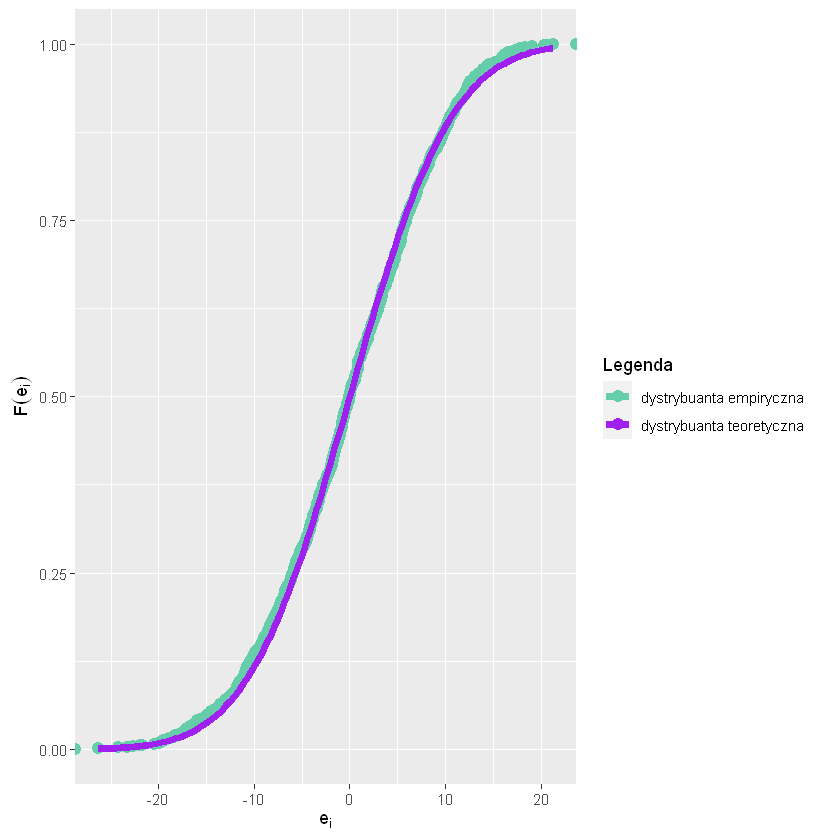

In [57]:
dyst <- ggplot(df_ei, aes(ei))+
    stat_ecdf(geom='point', aes(col='dystrybuanta empiryczna'), cex=3)+ 
    stat_function(fun=pnorm, args=list(mean=0, sd=8.4), 
                  aes(col='dystrybuanta teoretyczna'), linewidth=2)+
    xlab(TeX('$e_i$'))+ ylab(TeX('$F(e_i)$'))+
    scale_color_manual(values=c('aquamarine3', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
dyst

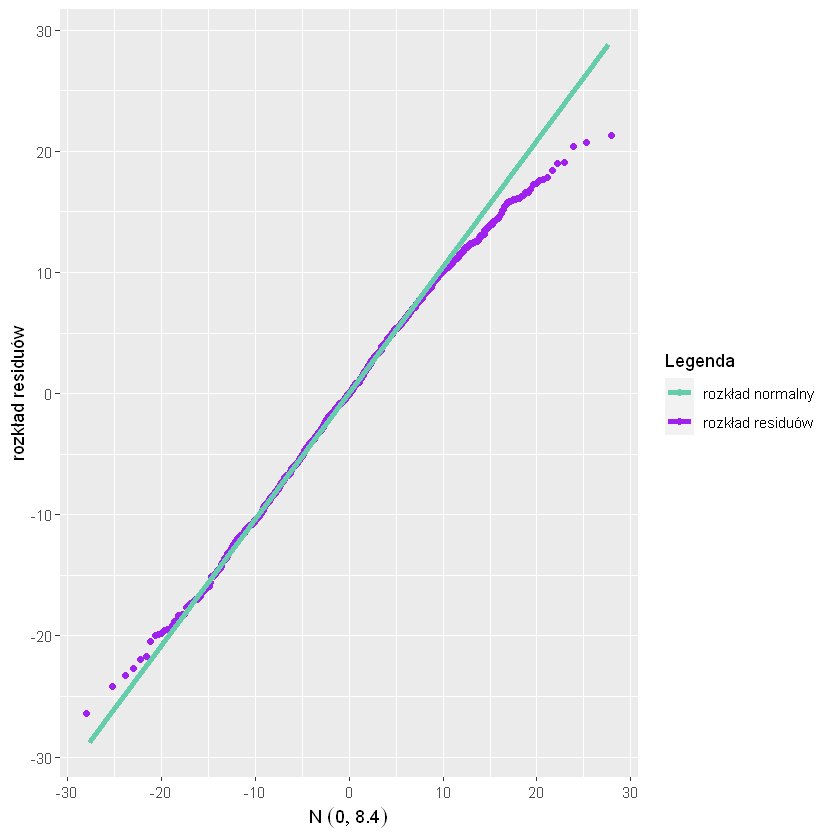

In [58]:
qqplot <- ggplot(df_ei, aes(sample=ei)) + stat_qq(aes(col='rozkład residuów'), 
                                        distribution = stats::qnorm,
                                        dparams = list(mean=0, sd=8.5)) +
    stat_qq_line(aes(col='rozkład normalny'), linewidth=1.5, 
                 distribution = stats::qnorm,
                 dparams = list(mean=0, sd=8.4))+
    xlab(TeX('$N\\,(0,8.4)$'))+ ylab('rozkład residuów')+
    scale_color_manual(values=c('aquamarine3', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
qqplot

# Checking the quality of linear regression model fit

Warning message:
"Removed 600 rows containing missing values (`geom_point()`)."


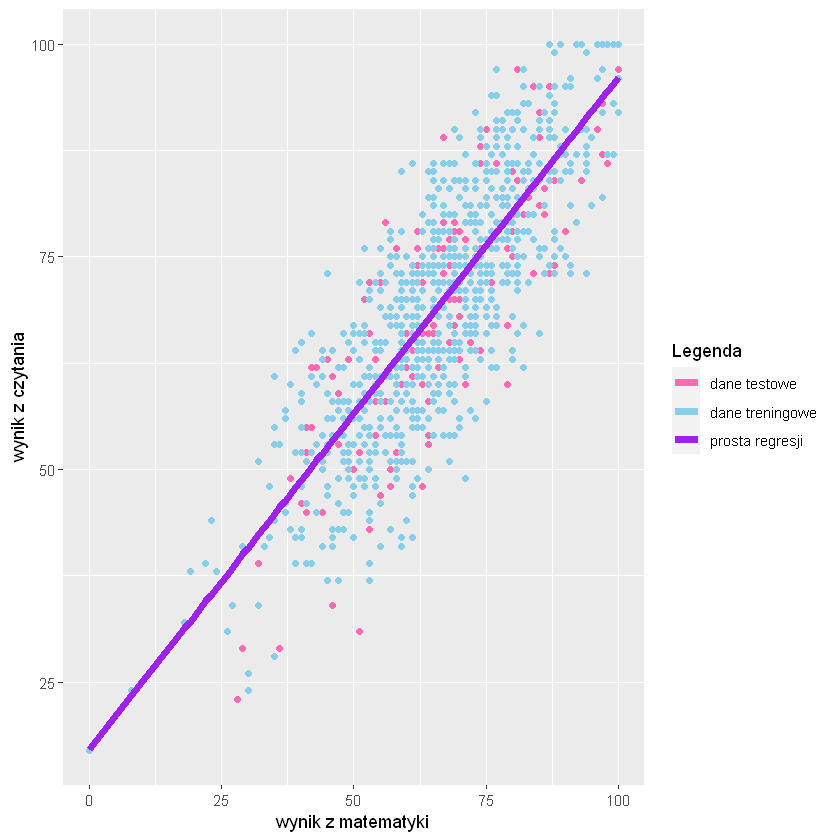

In [59]:
na_df <- data.frame(rep(NA, 600), rep(NA, 600))
colnames(na_df) <- c('X_test', 'Y_test')
df_new <- rbind(df_test,na_df)
rozp <- ggplot(df_new)+geom_point(aes(X_test, Y_test, col='dane testowe'))+ 
    geom_point(aes(df_train$X_train, df_train$Y_train,col='dane treningowe'))+ 
    geom_line(aes(df_train$X_train,df_train$X_train*wsp[[1]]+wsp[[2]],col='prosta regresji'), linewidth=2)+
    xlab('wynik z matematyki')+ylab('wynik z czytania')+
    scale_color_manual(values=c('hotpink', 'skyblue', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
rozp

## Calculating confidence intervals

In [60]:
alpha <- 0.02
b0p <- wsp[[2]]
b1p <- wsp[[1]]
X_new <- df_test$X_test
xm <- mean(X_new)
Y_new <- df_test$Y_test
Ypt <- X_new*b1p+b0p
n_new <- length(X_new)
S2t <- sum((Y_new-Ypt)^2)/(n_new-2)
tq <- qt(1-alpha/2,n_new-2)
left0t <- b0p-tq*sqrt(S2)*sqrt(1/n_new+xm^2/sum((X_new-xm)^2))
right0t <- b0p+tq*sqrt(S2)*sqrt(1/n_new+xm^2/sum((X_new-xm)^2))
left1t <- b1p-tq*sqrt(S2)/sqrt(sum((X_new-xm)^2))
right1t <- b1p+tq*sqrt(S2)/sqrt(sum((X_new-xm)^2))

In [61]:
left0t
right0t
b0p

[1] 10.38083

[1] 23.71026

[1] 17.04555

In [62]:
left1t
right1t
b1p

[1] 0.6923341

[1] 0.8885303

[1] 0.7904322

In [63]:
S2

[1] 71.65695

In [64]:
S2t

[1] 67.88224

## Confidence intervals for test data

In [65]:
uf_prog_nieznana <- function(X,Y,x0,alpha){
    n <- length(X)
    xm <- mean(X)
    ym <- mean(Y)
    tq <- qt(1-alpha/2,n-2)
    b1p <- sum((X-xm)*(Y-ym))/sum((X-xm)^2)
    b0p <- ym-b1p*xm
    y0p <- b0p+b1p*x0
    Yp <- b0p+b1p*X
    s2 <- sum((Y-Yp)^2)/(n-2)
    leftn <- y0p-tq*sqrt(s2)*sqrt(1+1/n+(x0-xm)^2/sum((X-xm)^2))
    rightn <- y0p+tq*sqrt(s2)*sqrt(1+1/n+(x0-xm)^2/sum((X-xm)^2))
    result <- data.frame(leftn, rightn)
    colnames(result) <- c('left', 'right')
    return(result)
}

In [66]:
left <- vector()
right <- vector()
for(i in 1:length(X_test)){
    temp <- uf_prog_nieznana(df_train$X_train, df_train$Y_train, X_test[i], 0.02)
    left[i] <- temp$left
    right[i] <- temp$right
}

In [67]:
X_base <- df_train$X_train
xm <- mean(X_base)
Y_base <- df_train$Y_train
#Yp <- X_base*b1p+b0p

In [68]:
cor(X_base,Y_base)
ym <- mean(Y_base)
SST <- sum((Y_base-ym)^2)
SST
SSR <- sum((Yp-ym)^2)
SSR
SSE <- sum((Y_base-Yp)^2)
SSE
SSR+SSE
SSR/SST

[1] 0.8206071

[1] 175081.3

[1] 117899

[1] 57182.25

[1] 175081.3

[1] 0.673396

In [69]:
ym <- mean(Y)
SST <- sum((Y-ym)^2)
SST
SSR <- sum((wsp[[1]]*X+wsp[[2]]-ym)^2)
SSR
SSE <- sum((Y-wsp[[1]]*X-wsp[[2]])^2)
SSE
SSR+SSE
SSR/SST

[1] 212952.4

[1] 143519.2

[1] 70622.93

[1] 214142.1

[1] 0.6739494

Warning message:
"Removed 600 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 600 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 600 rows containing missing values (`geom_line()`)."


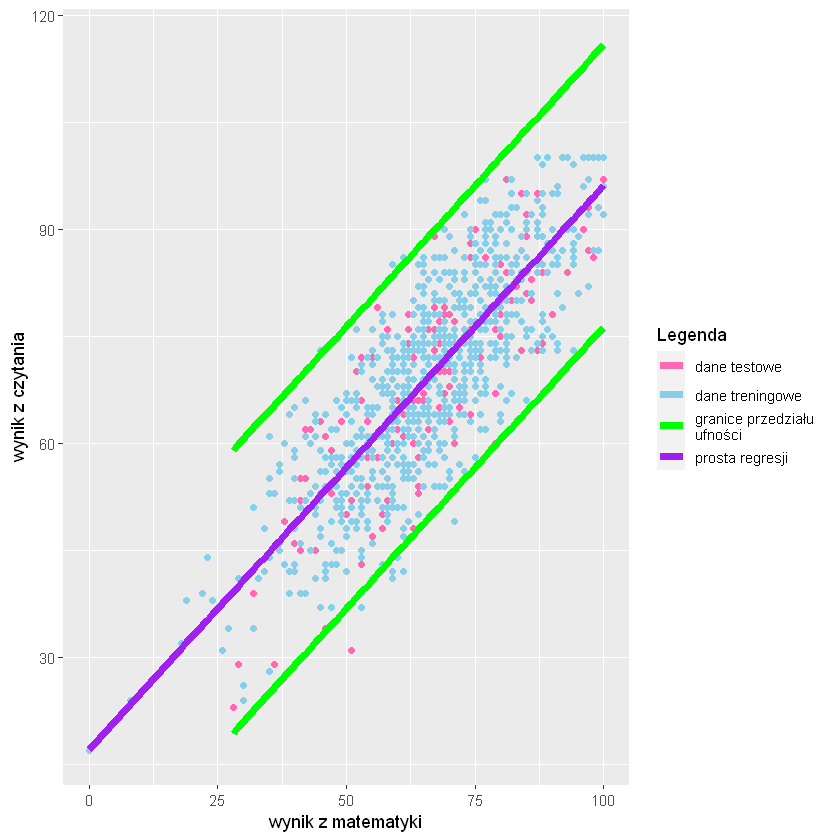

In [70]:
left1 <- c(left, rep(NA, 600))
right1 <- c(right, rep(NA, 600))
rozp2 <- ggplot(df_new)+geom_point(aes(X_test, Y_test, col='dane testowe'))+ 
    geom_point(aes(X_base, Y_base,col='dane treningowe'))+ 
    geom_line(aes(X_base, X_base*wsp[[1]]+wsp[[2]],col='prosta regresji'), linewidth=2)+
    geom_line(aes(X_test, left1, col='granice przedziału \nufności'), linewidth=2)+
    geom_line(aes(X_test, right1, col='granice przedziału \nufności'), linewidth=2)+
    xlab('wynik z matematyki')+ylab('wynik z czytania')+
    scale_color_manual(values=c('hotpink', 'skyblue', 'green', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
rozp2

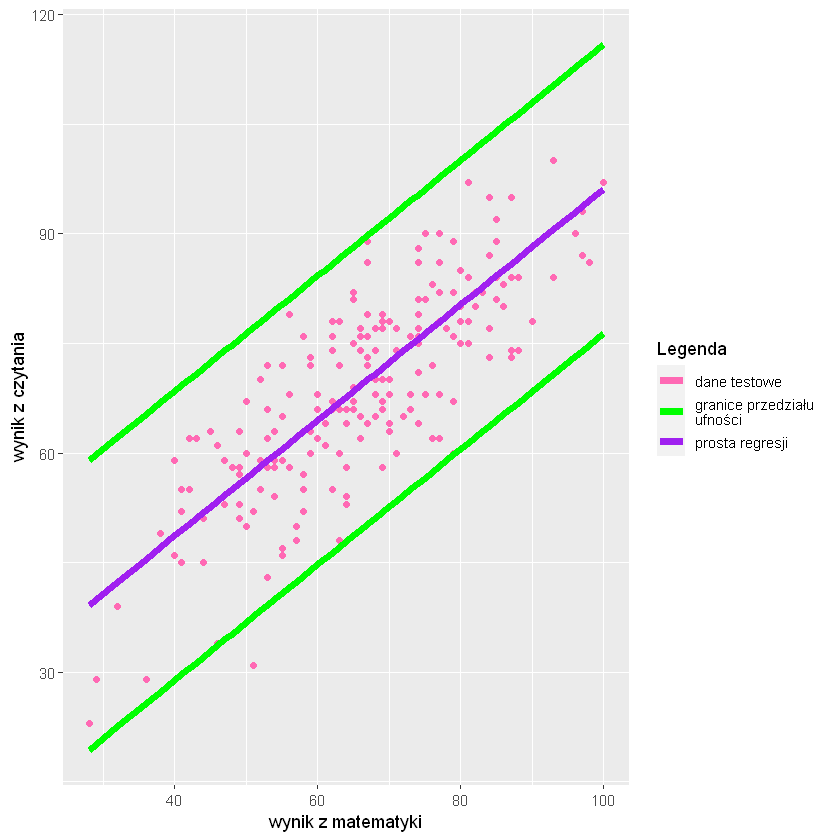

In [71]:
rozp3 <- ggplot(df_test)+geom_point(aes(X_test, Y_test, col='dane testowe'))+ 
    geom_line(aes(X_test, X_test*wsp[[1]]+wsp[[2]],col='prosta regresji'), linewidth=2)+
    geom_line(aes(X_test, left, col='granice przedziału \nufności'), linewidth=2)+
    geom_line(aes(X_test, right, col='granice przedziału \nufności'), linewidth=2)+
    xlab('wynik z matematyki')+ylab('wynik z czytania')+
    scale_color_manual(values=c('hotpink', 'green', 'purple'))+
    guides(col=guide_legend(title="Legenda"))
rozp3